<a href="https://colab.research.google.com/github/DeftJackal/Midterm-Project/blob/main/Models_withWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
# import linear_model and datasets from sklearn
from matplotlib import pyplot
# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [15]:
# Get my dataframe with weather desctription feature
flights = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Jan2019_Atlanta_Flights_withWeather.csv')

In [16]:
flights.columns

Index(['Unnamed: 0', 'fl_date', 'dep_time', 'origin_city_name', 'dep_delay',
       'weather_delay', 'weatherDesc'],
      dtype='object')

In [ ]:
flights.drop("Unnamed: 0",axis=1)

In [18]:
# Get my dataframe with all the columns still intact
full_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ATL_Jan19_Full_DF.csv')

In [ ]:
full_df.columns

In [20]:
# concat the flights['weatherDesc'] column to the full_df

descriptions = flights["weatherDesc"]
full_df = full_df.join(descriptions)

In [ ]:
full_df.head()

In [ ]:
# Make a dataframe identical to james' in every way except filtered to Jan 2019 for ATL airport 

In [41]:
# Select features 
feature_cols = ['fl_date', 'origin_airport_id',	'dest_airport_id',	'crs_dep_time',	'crs_arr_time',	'crs_elapsed_time',	'distance', 'op_unique_carrier', 'arr_delay', 'weatherDesc']

In [42]:
# trim features down to match James baselineDF
df1 = full_df[feature_cols]

In [ ]:
# set column 'arr_delay'to binary 'is_arr_del
df1['is_arr_delayed'] = 0
df1['is_arr_delayed'].loc[df1['arr_delay'] > 0] = 1

In [44]:
# make dummy variables for 'op_unique_carrier'
df2 = pd.get_dummies(df1, prefix = ['op_unique_carrier'], columns = ['op_unique_carrier'])

In [50]:
# break 'fl_date' down into year, month, day, weekday
df2['fl_date'] = pd.to_datetime(df2['fl_date'], format = '%Y-%m-%d')
# Create new columns
df2['day'] = df2['fl_date'].dt.day
df2['month'] = df2['fl_date'].dt.month
df2['year'] = df2['fl_date'].dt.year
df2['weekday'] = df2['fl_date'].dt.dayofweek

In [58]:
# label encode weatherDesc column, convert column to category, then assign the encoded variable to a new column using the cat.codes
df2["weatherDesc"] = df2["weatherDesc"].astype('category')
df2["weatherDesc_cat"] = df2["weatherDesc"].cat.codes

In [61]:
# drop the features that have been re-engineered
df3 = df2.drop(columns = ['arr_delay', 'fl_date', 'weatherDesc'], axis = 1)

In [66]:
df3.columns

Index(['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'is_arr_delayed',
       'op_unique_carrier_9E', 'op_unique_carrier_AA', 'op_unique_carrier_AS',
       'op_unique_carrier_B6', 'op_unique_carrier_DL', 'op_unique_carrier_EV',
       'op_unique_carrier_F9', 'op_unique_carrier_G7', 'op_unique_carrier_MQ',
       'op_unique_carrier_NK', 'op_unique_carrier_OH', 'op_unique_carrier_OO',
       'op_unique_carrier_UA', 'op_unique_carrier_WN', 'op_unique_carrier_YV',
       'op_unique_carrier_YX', 'day', 'month', 'year', 'weekday',
       'weatherDesc_cat'],
      dtype='object')

In [65]:
# Save df3 at Jan19_ATL_df_forModeling
df3.to_csv('Jan19_ATL_encodedForModeling.csv')

In [3]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Jan19_ATL_encodedForModeling.csv')

Run Logistic Regression Model

In [4]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [42]:
# set one column is_arr_delay is target
# everything else is train test split 

In [5]:
feature_cols_withW = ['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance',
       'op_unique_carrier_9E', 'op_unique_carrier_AA', 'op_unique_carrier_AS',
       'op_unique_carrier_B6', 'op_unique_carrier_DL', 'op_unique_carrier_EV',
       'op_unique_carrier_F9', 'op_unique_carrier_G7', 'op_unique_carrier_MQ',
       'op_unique_carrier_NK', 'op_unique_carrier_OH', 'op_unique_carrier_OO',
       'op_unique_carrier_UA', 'op_unique_carrier_WN', 'op_unique_carrier_YV',
       'op_unique_carrier_YX', 'day', 'month', 'year', 'weekday',
       'weatherDesc_cat']
feature_cols_noW = ['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance',
       'op_unique_carrier_9E', 'op_unique_carrier_AA', 'op_unique_carrier_AS',
       'op_unique_carrier_B6', 'op_unique_carrier_DL', 'op_unique_carrier_EV',
       'op_unique_carrier_F9', 'op_unique_carrier_G7', 'op_unique_carrier_MQ',
       'op_unique_carrier_NK', 'op_unique_carrier_OH', 'op_unique_carrier_OO',
       'op_unique_carrier_UA', 'op_unique_carrier_WN', 'op_unique_carrier_YV',
       'op_unique_carrier_YX', 'day', 'month', 'year', 'weekday']

In [6]:
# X Data with weather feature
X_withW = df3[feature_cols_withW].values

In [7]:
# X Date no weather feature
X_noW = df3[feature_cols_noW]

In [8]:
y = df3['is_arr_delayed'].values

Log Reg with Weather Model

In [9]:
# split X and y into training and testing sets
X_withW_train,X_withW_test,y_train,y_test=train_test_split(X_withW,y,test_size=0.25,random_state=0)

In [39]:
# fit the model with data
model_1 = logreg.fit(X_withW_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
# make predictions
y_withW_pred=model_1.predict(X_withW_test)

In [42]:
print("Accuracy of model with weather feature:",metrics.accuracy_score(y_test, y_withW_pred))

Accuracy of model with weather feature: 0.7076390669059216


In [46]:
importance = model_1.coef_[0]

In [47]:
importance

array([-5.64786993e-05, -6.54306056e-06, -4.09040170e-05,  1.26249699e-04,
       -1.72485144e-02,  2.54071444e-03, -4.70766974e-04,  2.73754945e-04,
       -4.48492143e-05,  1.09946825e-04, -2.31425879e-03,  4.69505854e-06,
        2.59910348e-04,  6.99615380e-05, -9.54868296e-06,  1.87453457e-04,
        1.24720571e-04,  6.79506707e-04,  2.42813970e-04,  5.66214550e-04,
        1.74570997e-04,  1.45869264e-04,  1.41268202e-02, -5.43221114e-09,
       -1.09676343e-05,  1.01033913e-02, -9.68249213e-03])

In [48]:
# Feature Importance for baseline Logistic Regression Model
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00006
Feature: 1, Score: -0.00001
Feature: 2, Score: -0.00004
Feature: 3, Score: 0.00013
Feature: 4, Score: -0.01725
Feature: 5, Score: 0.00254
Feature: 6, Score: -0.00047
Feature: 7, Score: 0.00027
Feature: 8, Score: -0.00004
Feature: 9, Score: 0.00011
Feature: 10, Score: -0.00231
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00026
Feature: 13, Score: 0.00007
Feature: 14, Score: -0.00001
Feature: 15, Score: 0.00019
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.00068
Feature: 18, Score: 0.00024
Feature: 19, Score: 0.00057
Feature: 20, Score: 0.00017
Feature: 21, Score: 0.00015
Feature: 22, Score: 0.01413
Feature: 23, Score: -0.00000
Feature: 24, Score: -0.00001
Feature: 25, Score: 0.01010
Feature: 26, Score: -0.00968


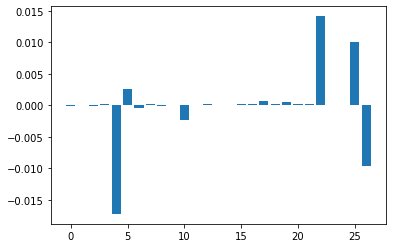

In [52]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# note, convergence error, need to increase interations or improve parameters

Gridsearch for Weather Log Reg

In [34]:
# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'max_iter' : [100, 1000, 10000],
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'l1_ratio' : [0.01, 0.1]}

In [36]:
grid = GridSearchCV(logreg, param_grid, verbose = 1, n_jobs = -1)

In [37]:
bestF = grid.fit(X_withW_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  87 out of  90 | elapsed:   10.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   11.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIST

In [18]:
# make predictions
y_withW_pred=logreg.predict(X_withW_test)

In [19]:
print("Accuracy of model with weather feature:",metrics.accuracy_score(y_test, y_withW_pred))
# Accuracy of model with weather feature: 0.7076390669059216

Accuracy of model with weather feature: 0.7076390669059216


In [57]:
print('Best max_iter:', bestF.best_estimator_.get_params()['max_iter'])
print('Best penalty:', bestF.best_estimator_.get_params()['penalty'])
print('Best l1_ratio:', bestF.best_estimator_.get_params()['l1_ratio'])
# Best max_iter: 100
# Best penalty: l2
# Best l1_ratio: 0.01

Best max_iter: 100
Best penalty: l2
Best l1_ratio: 0.01


Log Reg without Weather Model

In [54]:
# split X and y into training and testing sets
X_noW_train,X_noW_test,y_train,y_test=train_test_split(X_noW,y,test_size=0.25,random_state=0)

In [80]:
# fit the model with data
model_2 = logreg.fit(X_noW_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
# make predictions
y2_noW_pred=logreg.predict(X_noW_test)

In [82]:
print("Accuracy of model without weather feature:",metrics.accuracy_score(y_test, y_noW_pred))

Accuracy of model without weather feature: 0.707254550115355


Random Forest with Weather

In [20]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [25]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)


In [31]:
#Train the model using the training sets y_pred=clf.predict(X_test)
model_3 = clf.fit(X_withW_train,y_train)

In [27]:
y3_pred=clf.predict(X_withW_test)

In [28]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
# Random Forest with n_estimators = 200
# Accuracy: 0.7326326582927455

Accuracy: 0.7326326582927455


Random Forest Without Weather

In [55]:
#Train the model using the training sets y_pred=clf.predict(X_test)
model_4 = clf.fit(X_noW_train,y_train)

In [56]:
y4_pred=clf.predict(X_noW_test)

In [57]:
print("Accuracy :",metrics.accuracy_score(y_test, y4_pred))

Accuracy : 0.7332735196103564


In [ ]:
# Random Forest is better than Log Reg